In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Part 1
split training data (i.e. spam train.txt) into a training set and a validation set, putting
the last 1000 emails into the validation set. Thus, we will have a new training set (call it
train.txt) with 4000 emails and a validation set (call it validation.txt) with 1000 emails.

In [2]:
f = open('spam_train.txt','r')
content = f.readlines()
f.close()
train_lines = content[:4000]
val_lines = content[4000:]
f = open('train.txt', 'w')
f.write(''.join(train_lines))
f.close()
f = open('validation.txt', 'w')
f.write(''.join(val_lines))
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'spam_train.txt'

Transform all of the data into feature vectors as follows. Build a vocabulary list
using only the 4000 e-mail training set by finding all words that occur across the training set.

In [3]:
def words(data_file, X=20, N=-1):
    # X: frequency threshold
    # N: the number of emails used to generate the vocabulary
    # N = -1 denotes using all emails
    vocabulary = []
    f = open(data_file,'r')
    content = f.readlines()
    f.close()
    if N == -1:
        N = len(content)
    all_words = {}
    for i in content[:N]:
        for j in set(i.strip().split()):
            if all_words.get(j) == None:
                all_words[j] = 1
            else:
                all_words[j] +=1
    for key in all_words.keys():
        if all_words[key] >= X:
            vocabulary.append(key)
    vocabulary.remove('1')
    vocabulary.remove('0')      
    return vocabulary

In [5]:
print(words('train.txt'))

['cours', 'net', 'domain', 'excit', 'approv', 'manag', 'will', 'promot', 'us', 'origin', 'current', 'compani', 'price', 'can', 'much', 'gener', 'avail', 'and', 'i', 'to', 'an', 'info', 'dollarnumb', 'it', 'you', 'more', 'panel', 'right', 'e', 'email', 'just', 'afford', 'public', 'number', 'administr', 'same', 'name', 'brand', 'at', 'sincer', 'final', 'biz', 'as', 'attract', 'mail', 'new', 'by', 'is', 'these', 'that', 'for', 'rememb', 'of', 'easier', 'full', 'com', 'benefit', 'have', 'be', 'discount', 'address', 'the', 'includ', 'click', 'biggest', 'fee', 'recent', 'easi', 'httpaddr', 'now', 'well', 'access', 'visit', 'announc', 'were', 'on', 'registr', 'or', 'in', 'control', 'your', 'remov', 'regist', 'from', 'futur', 'extens', 'thi', 'here', 'todai', 'ar', 'further', 'offer', 'north', 'confidenti', 'alaska', 'below', 'island', 'tax', 'present', 'citizen', 'return', 'delai', 'thank', 'nation', 'main', 'direct', 'subject', 'other', 'texa', 'state', 'take', 'note', 'time', 'help', 'dai',

For each email, transform it into a feature vector x where the j-th entry, $x_j$ is 1 if the j-th word in the vocabulary occurs in the email, and 0 otherwise.

In [6]:
def feature_vector(email,vocab_dict):
    # vocab_dict is a dictionary that maps words to index in vocabulary list
    result = []
    lst = email.strip().split()
    for key in vocab_dict.keys():
        if key in lst:
        vocab_dict[key] = 1
    for value in vocab_dict.values():
        result.append(value)
    return result

### Part 2
The function ``perceptron_train`` trains a perceptron classifier, and should return ``w``, ``k``, and ``iter``,
which are respectively the final classification vector (as a Python list), the number of updates
(i.e., mistakes) performed (integer), and the number of passes through the data (integer).

The function ``perceptron_error`` should take as inputs the weight vector w and
a set of examples. The function should return the error rate, i.e., the fraction of examples
that are misclassified by ``w``.



In [7]:
def perceptron_train(train_x, train_y, max_iter = 100):
    train_y = train_y * 2 - 1 # convert the {0,1} labels to {-1,1}
    n_data, n_feature = train_x.shape
    w = np.zeros(n_feature) # vector w to be trained
    iters = 0 # count the number of iterations
    k = 0 # count the number of mistakes
    converge_count = 0
    while converge_count < n_data and iters < max_iter: 
        for i in range(n_data):
            if train_y[i]*(np.dot(train_x[i],w)) <= 0:
                w = w + train_y[i]*train_x[i]
                k+=1
                converge_count = 0
            else:
                converge_count += 1
        iters += 1
    return w, k, iters
        
def perceptron_error(w, val_x, val_y):
    val_y = val_y * 2 - 1
    n_data, n_feature = val_x.shape
    n_correct = 0 # number of samples correctly classified
    for i in range(n_data):
        if val_y[i]*(np.dot(val_x[i],w)) >= 0:
            n_correct += 1
    return 1 - n_correct / n_data

### Part 3

Train the linear classifier using the training set. 

In [8]:
def feature_vectors(data_file, vocabulary):
    # convert a file to x, y array
    f = open(data_file,'r')
    content = f.readlines()
    f.close()
    y = []
    x = []
    vocab_dict = {}
    for i in content:
        for j in vocabulary:
            vocab_dict[j] = 0
        y.append(int(i.strip()[0]))
        x.append(feature_vector(i.strip(),vocab_dict))
    y = np.array(y)
    x = np.array(x)
    return x, y

vocabulary = words('train.txt')
train_x, train_y = feature_vectors('train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y)
print('Errors made:', k)
val_x, val_y = feature_vectors('validation.txt', vocabulary)
print('Validation error: %.6f' % perceptron_error(w, val_x, val_y))

Errors made: 415
Validation error: 0.016000


### Part 4

Using the vocabulary list together with the parameters learned in the previous question, output
the 12 words with the most positive weights.

In [9]:
# show the 12 words with the most positive weights
weights_dict = {}
for i in range(len(vocabulary)):
    weights_dict[vocabulary[i]] = w[i]
L = sorted(weights_dict.items(),key = lambda item:item[1], reverse = True)
l_pos = L[:12]
l_neg = L[-12:]
dict_pos, dict_neg = {},{}
for i in l_pos:
    dict_pos[i[0]] = i[1]
for i in l_neg:
    dict_neg[i[0]] = i[1]
print(dict_pos)

{'sight': 20.0, 'click': 17.0, 'remov': 16.0, 'pleas': 15.0, 'these': 14.0, 'internet': 13.0, 'guarante': 13.0, 'deathtospamdeathtospamdeathtospam': 13.0, 'our': 12.0, 'am': 12.0, 'will': 11.0, 'access': 11.0}


12 words with the most negative weights

In [10]:
# show the 12 words with the most negative weights
print(dict_neg)

{'date': -10.0, 'run': -11.0, 'still': -11.0, 'url': -11.0, 'said': -11.0, 'there': -12.0, 'copyright': -12.0, 'server': -12.0, 'i': -13.0, 'reserv': -13.0, 'prefer': -14.0, 'wrote': -16.0}


### Part 5
Test whether the test error decreases as the amount of training data increases. Using only the first $N$ rows of the training data, run both the perceptron algorithm on this smaller training set and evaluate the corresponding validation error (using all of the validation data). Do this for $N = 100, 200, 400, 800, 2000, 4000$, and create a plot of the validation error as a function of $N$.

In [11]:
def hyperparameter_test(X=20, N=-1):
    # X: frequency threshold
    # N: the number of emails used to generate the vocabulary
    # In Q6 you will need to add an extra argument max_iters
    # Returns: the number of iterations and the error rate
    vocabulary = words('train.txt',N=N)
    f = open('train.txt','r')
    content = f.readlines()
    f.close()
    f = open('temp.txt','w')
    f.write(''.join(content[:N]))
    f.close()
    train_x, train_y = feature_vectors('temp.txt', vocabulary)
    w, k, iters = perceptron_train(train_x, train_y)
    val_x, val_y = feature_vectors('validation.txt', vocabulary)
    error = perceptron_error(w, val_x, val_y)
    return iters, error

In [12]:
Ns = [100, 200, 400, 800, 2000, 4000]
validation_errors = []
iterations = []
for N in Ns:
    print('Now training with %d samples' % N)
    iters, error = hyperparameter_test(N = N)
    validation_errors.append(error)
    iterations.append(iters)

Now training with 100 samples
Now training with 200 samples
Now training with 400 samples
Now training with 800 samples
Now training with 2000 samples
Now training with 4000 samples


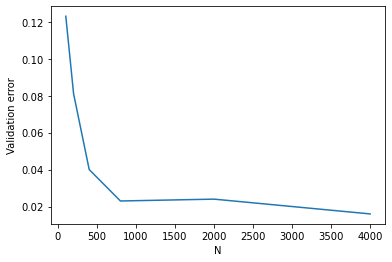

In [13]:
plt.plot(Ns, validation_errors)
plt.xlabel('N')
plt.ylabel('Validation error')
plt.show()

Also for $N = 100, 200, 400, 800, 2000, 4000$, create a plot of the number of perceptron iterations as a function of N, where by iteration we mean a complete pass through the training data. As the amount of training data increases, the margin of the training set decreases, which generally leads to an increase in the number of iterations perceptron takes to converge.

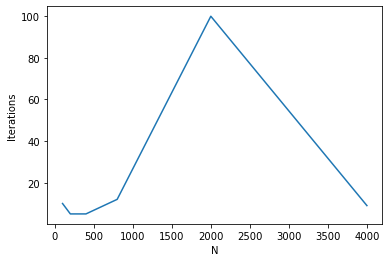

In [14]:
plt.plot(Ns, iterations)
plt.xlabel('N')
plt.ylabel('Iterations')
plt.show()

### Part 6
Try various configurations of the algorithm using all 4000 training points, and find a good configuration having a low error on the validation set. In particular, try changing the maximum number of iterations and try changing X = 30, 40. Report the validation error.

In [15]:
print('max iteration time is 4')
vocabulary = words('train.txt')
train_x, train_y = feature_vectors('train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y,max_iter = 4)
print('Errors made:', k)
val_x, val_y = feature_vectors('validation.txt', vocabulary)
print('Validation error: %.6f' % perceptron_error(w, val_x, val_y))

max iteration time is 4
Errors made: 374
Validation error: 0.017000


In [16]:
print('max iteration time is 9')
vocabulary = words('train.txt')
train_x, train_y = feature_vectors('train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y,max_iter = 9)
print('Errors made:', k)
val_x, val_y = feature_vectors('validation.txt', vocabulary)
print('Validation error: %.6f' % perceptron_error(w, val_x, val_y))

max iteration time is 9
Errors made: 415
Validation error: 0.016000


In [17]:
print('max iteration time is 16')
vocabulary = words('train.txt')
train_x, train_y = feature_vectors('train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y,max_iter = 16)
print('Errors made:', k)
val_x, val_y = feature_vectors('validation.txt', vocabulary)
print('Validation error: %.6f' % perceptron_error(w, val_x, val_y))

max iteration time is 16
Errors made: 415
Validation error: 0.016000


In [18]:
print('max iteration time is 9, X = 30')
vocabulary = words('train.txt',X = 30)
train_x, train_y = feature_vectors('train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y,max_iter = 9)
print('Errors made:', k)
val_x, val_y = feature_vectors('validation.txt', vocabulary)
print('Validation error: %.6f' % perceptron_error(w, val_x, val_y))

max iteration time is 9, X = 30
Errors made: 445
Validation error: 0.014000


In [19]:
print('max iteration time is 9, X = 40')
vocabulary = words('train.txt',X = 40)
train_x, train_y = feature_vectors('train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y,max_iter = 9)
print('Errors made:', k)
val_x, val_y = feature_vectors('validation.txt', vocabulary)
print('Validation error: %.6f' % perceptron_error(w, val_x, val_y))

max iteration time is 9, X = 40
Errors made: 491
Validation error: 0.016000


### Part 7
train on the full training set, and see if it works on completely new data.

In [20]:
vocabulary = words('spam_train.txt', X = 20)
train_x, train_y = feature_vectors('spam_train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y, max_iter = 9)
print('Errors made:', k)
test_x, test_y = feature_vectors('spam_test.txt', vocabulary)
print('Test error: %.6f' % perceptron_error(w, test_x, test_y))

Errors made: 493
Test error: 0.023000
